# **Sports Classification**



In this Notebook We Are Going to Work On A Multi Class Classificationn Dataset.It Is A Veruy Common Problem in The Industury.

It Contains  aroud 13,492 Different Images For training set for 100 Different Sports.
It Contains  aroud 500 Different Images For Validation set for 100 Different Sports.
It Contains  aroud 500 Different Images For training set for 100 Different Sports.

I Am Going to Create A Deep Learning Model Which can able to predict the sport by just looking at the Image.
In This Prokect We Are Going to Create Our Own Model For This.And Check It's Accuracy.

If It Don't satisfy us We Are Also Goind To Use Different Pretrainded Model Like **VGG-16**,**Efficient Net 0**,**ResNet-50**.
I will Also Give You A Brief Introuction To Our Notebook

### So If You Like This Notebook Please Upvote It

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import layers,Sequential
from keras.layers import Dense, Flatten,Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


2024-04-04 17:53:04.673426: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 17:53:04.673523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 17:53:04.846579: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
print(tf.__version__)

2.15.0


### Getting Data

In [3]:
train_dir="/kaggle/input/sports-classification/train"
test_dir="/kaggle/input/sports-classification/test"
valid_dir="/kaggle/input/sports-classification/valid"

##### `tf.keras.utils.image_dataset_from_directory` This Fuction Just Give us Our Data by Doing All The Necessary Things Like REsizing Of Image,And Batch Sizew

In [4]:
train_df=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                    batch_size=16,
                                                     seed=1680,
                                                    image_size=(180,180),
                                                    )


Found 13492 files belonging to 100 classes.


In [5]:
test_df=tf.keras.utils.image_dataset_from_directory(test_dir,
                                                    batch_size=16,
                                                     seed=1680,
                                                    image_size=(180,180),
                                                    )

Found 500 files belonging to 100 classes.


In [6]:
val_df=tf.keras.utils.image_dataset_from_directory(valid_dir,
                                                    batch_size=16,
                                                     seed=1680,
                                                    image_size=(180,180),
                                                    )

Found 500 files belonging to 100 classes.


##### Getting Class Names For Our Data

In [7]:
class_names=train_df.class_names

### EDA

Getting Rabdom Images For Our Train Dataset 

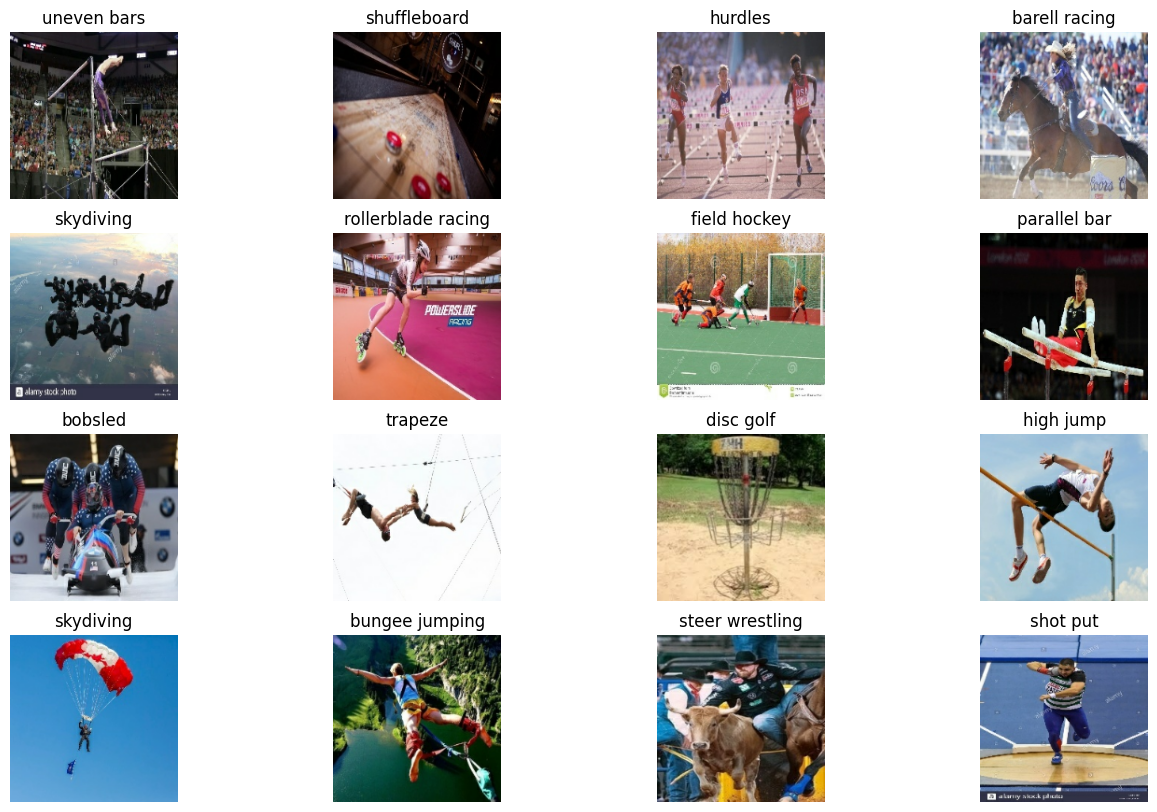

In [8]:
plt.figure(figsize=(16,10))
for images,labels in train_df.take(1):
    for i in range(16):       
        ax=plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

##### Same for test Set

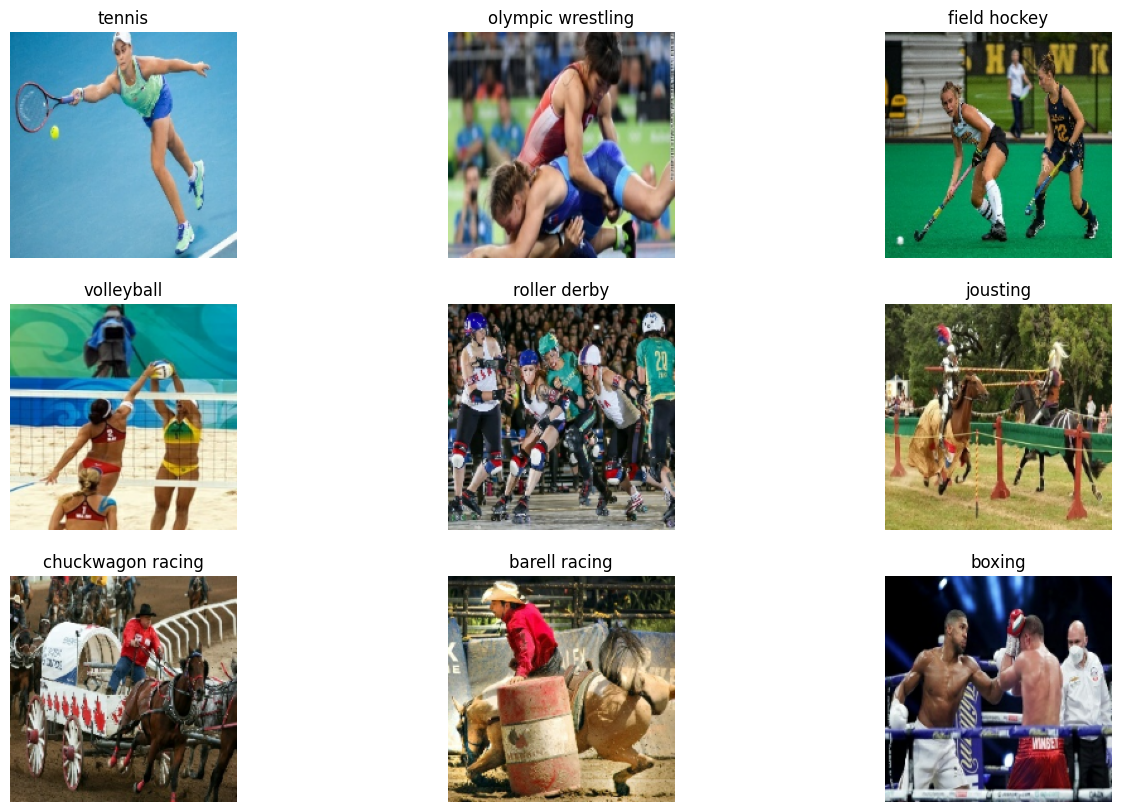

In [9]:
plt.figure(figsize=(16,10))
for images,labels in test_df.take(1):
    for i in range(9):       
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Making Use of Data using Easier By Tf.data.api

In [10]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_df.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds=test_df.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Normalization Layer

In [12]:
normalization_layer=layers.Rescaling(1./255)

In [13]:
batch_size=16
img_height=180
img_width=180

In [14]:
num_classes=len(class_names)

In [15]:
num_classes

100

## Our Own Model

In [16]:
model = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001,540 (15.26 MB)

 Trainable params: 4,001,540 (15.26 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    verbose=0,
    mode="max",
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

board_= tf.keras.callbacks.TensorBoard(
            log_dir = "/kaggle/working/logs",
            histogram_freq = 1,
            profile_batch = 2,
           update_freq = True
        )


#### Fitting The Model

In [20]:
epochs=50
history=model.fit(train_ds,
                  callbacks=[early_stopping,board_,reduce_lr],
                  epochs=epochs,
                  validation_data=val_df,
                  verbose=1)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-04-04 17:53:27.250835: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - accuracy: 0.0333 - loss: 4.4036 - val_accuracy: 0.1160 - val_loss: 3.7148 - learning_rate: 0.0010
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.1598 - loss: 3.4549 - val_accuracy: 0.2420 - val_loss: 3.1810 - learning_rate: 0.0010
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.2619 - loss: 2.9613 - val_accuracy: 0.2400 - val_loss: 3.2098 - learning_rate: 0.0010
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.3041 - loss: 2.6965 - val_accuracy: 0.3080 - val_loss: 2.7496 - learning_rate: 0.0010
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.3494 - loss: 2.4948 - val_accuracy: 0.3340 - val_loss: 2.6237 - learning_rate: 0.0010
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.3677 - loss: 2.3752 - val_accuracy: 0.4060 - val_loss: 2.3072 - learning_rate: 0.0010
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.3971 - loss: 2.2743

#### Evaluating Our Model

In [21]:
print('Test Score',model.evaluate(test_ds))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4993 - loss: 1.8603
Test Score [2.068845748901367, 0.49000000953674316]


In [22]:
print('Train Score',model.evaluate(train_ds))


844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5559 - loss: 1.6121
Train Score [1.627197265625, 0.5514379143714905]


In [23]:
print('Valid Score',model.evaluate(val_df))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4744 - loss: 1.9303
Valid Score [2.0003726482391357, 0.4740000069141388]


#### Plotting The Results Of Our Model

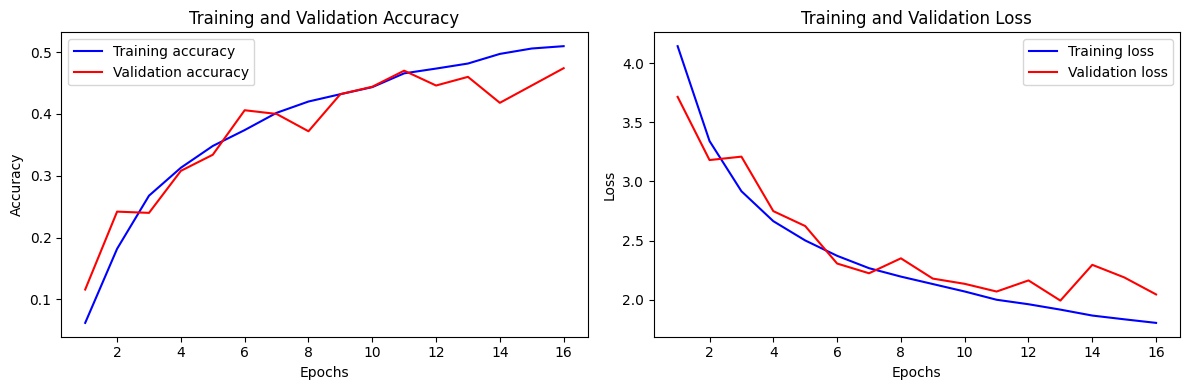

In [24]:
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(train_acc) + 1)

    # Plotting accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### *Our Accuracy Is Not That Great. So Can I Do Better* 

### Before That Let's Talk About A Topic Called `Transfer Learning`.

If You Don't Know It Then It is the best Time To Have A Simple Undderstanding Of this.

Well Transfer Learning in Simple Terms Can Be Defined As Using A Pretrained Model To Use In Some Other Problem.To get Bettre Results.
In Field of AI, Mostly Time We Are Facing Same Challenges Again And Again.Like Image Classification And Recognitization.
And The Appraoch to solve this Probelm is Mostly Same So Researchers Got An Amazing Idea.To Solve This Problem.

They Train A Deep Conv Net Model In A Very Large Image Of Dataset For The Problem.Basically A Model Weights Can Be Useful To Train On Own Dataset.And It Will Be Useful For Classification Problems.

In transfer learning, the knowledge of an already trained machine learning model is applied to a different but related problem. For example, if you trained a simple classifier to predict whether an image contains a backpack, you could use the knowledge that the model gained during its training to recognize other objects like sunglasses.

## **VGG-16**

#### *Time To Use Our Next Model*


VGG-16 Is A very Large Pretrained Model.It Won The `ILSVRC` Competition of 2014.
### [Research Paper For VGG16](https://arxiv.org/pdf/1409.1556.pdf)

VGG16 is object detection and classification algorithm which is able to classify 1000 images of 1000 different categories with 92.7% accuracy. It is one of the popular algorithms for image classification and is easy to use with transfer learning.They pushed the depth to 16–19 weight layers making it approx — 138 trainable parameters.

![Image Architecture](https://miro.medium.com/v2/resize:fit:828/format:webp/0*0M8CobXpNwFDCmOQ)

* VGG-16 Consist Of Total 16 Layers *13 For ConvLayers* And *3 For Dense Layer*.
* It Also Contains 5 Max Pooling Layers.

* VGG-16 Takes An Input Image of Shape (224,244,3).

* Conv-1 Layer has 64 number of filters, Conv-2 has 128 filters, Conv-3 has 256 filters, Conv 4 and Conv 5 has 512 filters.

* Most unique thing about VGG16 is that instead of having a large number of hyper-parameters they focused on having convolution layers of 3x3 filter with stride 1 and always used the same padding and maxpool layer of 2x2 filter of stride 2.

* The convolution and max pool layers are consistently arranged throughout the whole architecture

#### Importing VGG-16 Model

We Have Used Image Size Of Shape (180,180) not (224,224)

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

### Creating Our Model For VGG-16

In [26]:
base_model=VGG16(weights="imagenet",include_top=False,input_shape=(180,180,3))
base_model.trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
inputs_images=tf.keras.Input(shape=(180,180,3))

#### Using Data Augmentation

In [29]:
data_augmentation=tf.keras.Sequential(
[
        layers.RandomFlip("horizontal",
        input_shape=(img_height,
                    img_width,
                    3)),
      layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
]
)

In [30]:
x=data_augmentation(inputs_images)
x=normalization_layer(x)
x=base_model(x)
x=Flatten()(x)
x=Dense(256,activation="relu")(x)
output=Dense(100,activation="softmax")(x)
model=Model(inputs_images,outputs=output)


In [31]:
for layer in base_model.layers:
    layer.trainable = False

In [32]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

#### Fitting Our Model

In [33]:
EPOCHS=50
history=model.fit(train_ds,
          validation_data = val_df,
          epochs = EPOCHS,
         callbacks=[early_stopping,board_,reduce_lr],
          verbose = 1)

Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 63s 68ms/step - accuracy: 0.0998 - loss: 4.1161 - val_accuracy: 0.3800 - val_loss: 2.3339 - learning_rate: 0.0010
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 56s 66ms/step - accuracy: 0.3694 - loss: 2.4143 - val_accuracy: 0.5180 - val_loss: 1.7305 - learning_rate: 0.0010
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 56s 66ms/step - accuracy: 0.4569 - loss: 2.0027 - val_accuracy: 0.5640 - val_loss: 1.5894 - learning_rate: 0.0010
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 56s 66ms/step - accuracy: 0.5033 - loss: 1.7992 - val_accuracy: 0.5920 - val_loss: 1.4379 - learning_rate: 0.0010
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.5397 - loss: 1.6513 - val_accuracy: 0.6000 - val_loss: 1.4946 - learning_rate: 0.0010
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 56s 66ms/step - accuracy: 0.5603 - loss: 1.5702 - val_accuracy: 0.5880 - val_loss: 1.5014 - learning_rate: 0.0010
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 56s 66ms/step - accuracy: 0.5710 - l

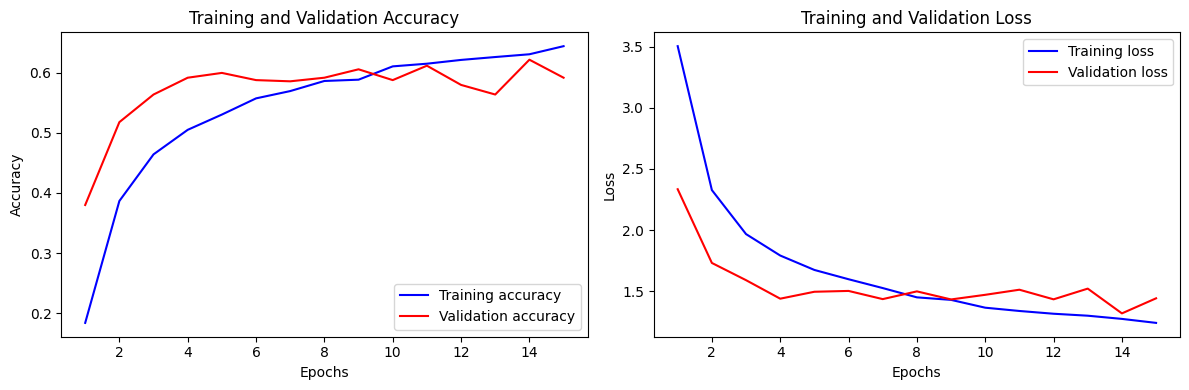

In [34]:
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(train_acc) + 1)

    # Plotting accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [35]:
print('Test Score',model.evaluate(test_ds))
print('Train Score',model.evaluate(train_ds))

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6762 - loss: 1.2383
Test Score [1.33103609085083, 0.6579999923706055]
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.7055 - loss: 0.9794
Train Score [0.9803652763366699, 0.7039726972579956]


### Using ResNet_50 Model

It is also A Very Interesting Model.Many researchers Think That By Incresing Depth of A Network It's Accuracy Can Be Incresed.But Reality Is different.As Model Layers Increses Soon a time comes When Model Accuracy Don;' Increses.

ResNet Stands For **Residual Network** And 50 stands For 50 Layers.It Can Also Be `ResNet101` And `Resnet151`.

![ResNet Architecture](https://datagen.tech/wp-content/uploads/2022/08/image1-1-414x1024.png)

**ResNet Gave A Concept Of Skip Connection.**

Baically Due To Back Propogation It Lead To Gradient Explosion.

##### But When Skip Connection Occur
$$ H=F(x)+x $$

Where x is The Image And F(x) is Convolution Operation On X.
By Using this H never Ges To 0

The 50-Layer ResNet Architecture Contains These Layers

* A 7x7 Kernel Convolution Alongside 64 Other Kernels With A 2 Sized Stride.

* A Max Pooling Layer

* **9 More Layers** - 3x3,64 Kernel Convolution,another with 1x1 64 kernels and a third with 1x1,256 Kernels.These Layers Are Repeated Layers

* **12 more layers** -  with 1×1,128 kernels, 3×3,128 kernels, and 1×1,512 kernels, iterated 4 times.

* **18 more layers** with 1×1,256 cores, and 2 cores 3×3,256 and 1×1,1024, iterated 6 times.

* **9 more layers** with 1×1,512 cores, 3×3,512 cores, and 1×1,2048 cores iterated 3 times.(up to this point the network has 50 layers)

* **Average pooling**, followed by a fully connected layer with 1000 nodes, using the softmax activation function.


#### It's Accuracy Is Like

![Architecture Performance](https://www.researchgate.net/publication/333842301/figure/fig1/AS:770991290585088@1560830056600/Performance-of-ResNet-50-forward-convolutions.png)
 

### Creating Our Base Model For **ResNet50**


In [36]:
base_model=ResNet50(weights="imagenet",include_top=False,input_shape=(180,180,3))

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(100, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model.input, outputs=output)


model_resnet50.compile(optimizer=Adam(learning_rate=0.001),
                       loss=SparseCategoricalCrossentropy(from_logits=False),
                       metrics=['accuracy'])

resnet_hist=model_resnet50.fit(
    train_ds,
    epochs=50,
    validation_data=val_df,
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
  3/844 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.0243 - loss: 18.6502

I0000 00:00:1712254546.228425      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712254546.281108      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0496 - loss: 7.8953

W0000 00:00:1712254586.906806      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


844/844 ━━━━━━━━━━━━━━━━━━━━ 57s 52ms/step - accuracy: 0.0497 - loss: 7.8919 - val_accuracy: 0.0840 - val_loss: 4.2031
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.1168 - loss: 3.9599 - val_accuracy: 0.1260 - val_loss: 3.8691
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.1681 - loss: 3.6311 - val_accuracy: 0.1780 - val_loss: 3.4496
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.2025 - loss: 3.3548 - val_accuracy: 0.1960 - val_loss: 3.5236
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.2262 - loss: 3.2230 - val_accuracy: 0.2220 - val_loss: 3.1929
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.2484 - loss: 3.0239 - val_accuracy: 0.2240 - val_loss: 3.3321
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.2725 - loss: 2.9050 - val_accuracy: 0.2280 - val_loss: 2.9923
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.2809 - loss: 2.7739 - val_accurac

#### Evaluating Our Res Net Model

In [37]:
print('Test Score',model_resnet50.evaluate(test_ds))
print('Train Score',model_resnet50.evaluate(train_ds))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3577 - loss: 4.4077
Test Score [4.759614944458008, 0.335999995470047]
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.4563 - loss: 2.0049
Train Score [1.9961735010147095, 0.4586421549320221]


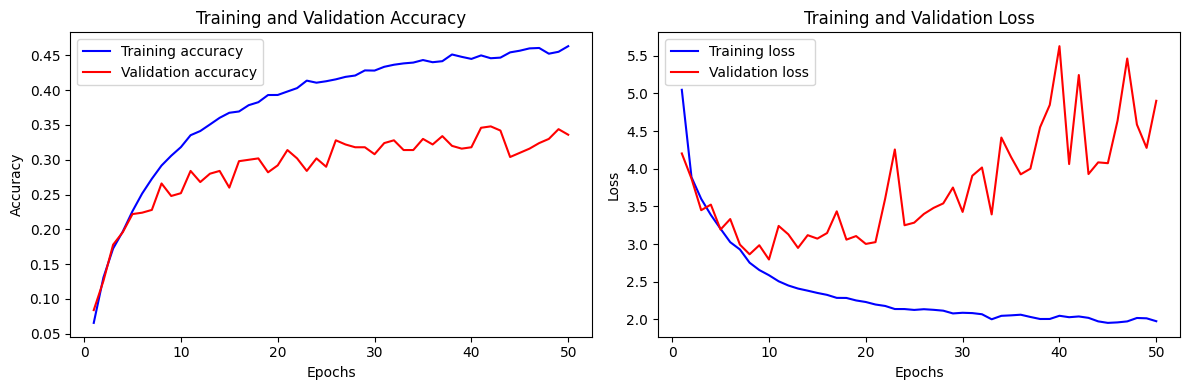

In [38]:
    train_acc = resnet_hist.history['accuracy']
    val_acc = resnet_hist.history['val_accuracy']
    train_loss = resnet_hist.history['loss']
    val_loss = resnet_hist.history['val_loss']

    epochs = range(1, len(train_acc) + 1)

    # Plotting accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Efficient Net-B0

#### [It is Introduced By Google AI In This Paper.](https://arxiv.org/abs/1905.11946)

Generally, the models are made too wide, deep, or with a very high resolution. Increasing these characteristics helps the model initially but it quickly saturates and the model made just has more parameters and is therefore not efficient. In EfficientNet they are scaled in a more principled way i.e. gradually everything is increased.


![Efficient Net ](https://miro.medium.com/v2/resize:fit:828/format:webp/0*FJos7uXvl-uLDpSQ.png)

They Use A Compounding Scaling Method.

Basically To Increase A Model  Accuracy.You Need To Do These Things.

* You Can Increase The Depth of Neural Network.By Increasing The Hidden Layers you can Get Better Accuracy.

* You Can Increase The Width of Neural Network.By Increasing The Kernels Or Filter.Great Filter Are Able to get more data from Image.

* You Can Increase Resolution Of Image.Image with 255x256 is better than Image with 70x70.

![Efficient Net B0](https://miro.medium.com/v2/resize:fit:828/format:webp/0*09AED_CjE-PUFxKC.png)

#### Compound Scaling 
$$ depth: d= alpha^phi $$
$$ width: w= beeta^phi $$
$$ resolution: r= gamma^phi $$

Where Φ is called the compound coefficient and α,β and γ are constants that can be found by a small grid search.

Φ is a coefficient specified by the user to control the amount of available resources. While α,β and γ assign these resources to the network's **depth, width and resolution** respectively.

It is also important to mention that the authors noticed that the FLOPS of a regular convolution operation are proportional to **d**, **w²**, **r²**. Since convolution operations dominate the computation cost in Convnets, using compound scaling on a Convnet increases the number of FLOPS by (α.β².γ²)Φ, thus the constraint **α.β².γ²≈2**, to increase the total FLOPS by **2Φ**.


#### Efficient Net Architecture

![Architecture](https://iq.opengenus.org/content/images/2022/11/Architecture-of-EfficientNet-B0-with-MBConv-as-Basic-building-blocks.png)

From the baseline network EfficientNet-B0, the authors applied the compound scaling method. First, they set Φ=1 and did a grid search to find the parameters α,β and γ based on the equations given in the previous section and under the constraint α.β².γ²≈2. The results were as follow α=1.2 , β=1.1 and γ=1.15.

#### Efficient Net Performance

![Performance](https://iq.opengenus.org/content/images/2022/11/EfficientNet_imagenet.png)


#### Model Architecture

In [39]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224,224, 3))
for layer in base_model.layers:
  layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.25)(x)
predictions = Dense(100,activation="softmax")(x) 

model = Model(inputs=base_model.input, outputs=predictions)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
train_dir

'/kaggle/input/sports-classification/train'

In [41]:
train_ds=tf.keras.utils.image_dataset_from_directory(train_dir,
                                                     seed=1906,
                                                     image_size=(224,224),
                                                     batch_size=32
                                                     )

Found 13492 files belonging to 100 classes.


In [42]:
test_ds=tf.keras.utils.image_dataset_from_directory(test_dir,
                                                     seed=1906,
                                                     image_size=(224,224),
                                                     batch_size=32
                                                     )

Found 500 files belonging to 100 classes.


In [43]:
val_ds=tf.keras.utils.image_dataset_from_directory(valid_dir,
                                                     seed=1906,
                                                     image_size=(224,224),
                                                     batch_size=32
                                                     )

Found 500 files belonging to 100 classes.


In [44]:
opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#### Fitting Our Model

In [45]:
history = model.fit(
      train_ds,
      epochs=50,
      validation_data = val_ds,
    callbacks=[
       early_stopping,
        reduce_lr
    ]
)

Epoch 1/50
  3/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.0000e+00 - loss: 4.7721

W0000 00:00:1712256339.246527      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6664 - loss: 1.4484

W0000 00:00:1712256379.408064      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712256385.896042      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


422/422 ━━━━━━━━━━━━━━━━━━━━ 85s 121ms/step - accuracy: 0.6667 - loss: 1.4469 - val_accuracy: 0.9520 - val_loss: 0.2071 - learning_rate: 0.0050
Epoch 2/50
  1/422 ━━━━━━━━━━━━━━━━━━━━ 1:17 183ms/step - accuracy: 0.9688 - loss: 0.1149

W0000 00:00:1712256390.144500      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9271 - loss: 0.2421 - val_accuracy: 0.9420 - val_loss: 0.1886 - learning_rate: 0.0050
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9534 - loss: 0.1512 - val_accuracy: 0.9340 - val_loss: 0.2162 - learning_rate: 0.0050
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9630 - loss: 0.1151 - val_accuracy: 0.9480 - val_loss: 0.1676 - learning_rate: 0.0050
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9712 - loss: 0.0965 - val_accuracy: 0.9560 - val_loss: 0.1573 - learning_rate: 0.0050
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9683 - loss: 0.0913 - val_accuracy: 0.9560 - val_loss: 0.1688 - learning_rate: 0.0050
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9745 - loss: 0.0825 - val_accuracy: 0.9440 - val_loss: 0.1855 - learning_rate: 0.0050
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.9694 - loss: 0.0992

#### Getting Our Results

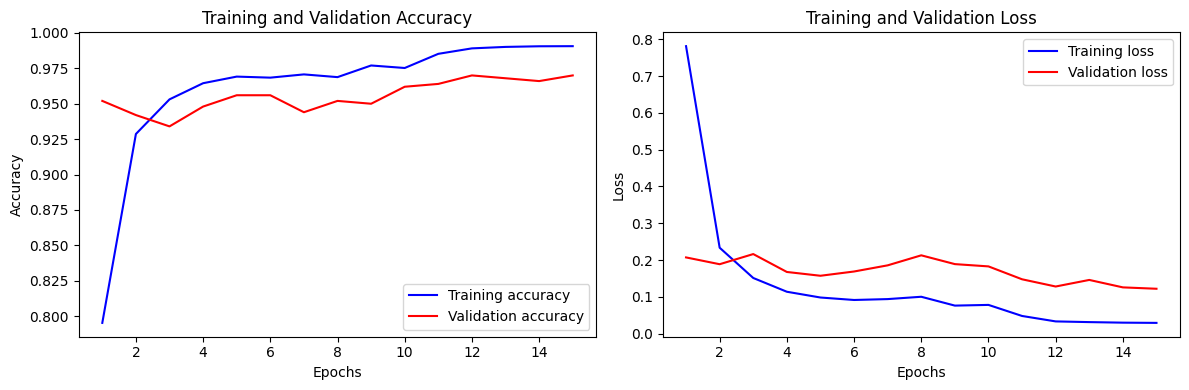

In [46]:
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(train_acc) + 1)

    # Plotting accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

#### Getting Scores Of Our Model

In [47]:
print('Test Score',model.evaluate(test_ds))
print('Train Score',model.evaluate(train_ds))
print('Valid Score',model.evaluate(val_ds))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9724 - loss: 0.0922
Test Score [0.13261565566062927, 0.9639999866485596]
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 1.0000 - loss: 0.0014
Train Score [0.0011846076231449842, 1.0]
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9618 - loss: 0.1202
Valid Score [0.12199738621711731, 0.9700000286102295]


### EfficientNet-B0 is the Best Model With Test Score of `0.97` and Train Score of `0.99`. 

## Saving The Best Model

In [48]:
model.save("Best_Model.h5")

In [49]:
predictions = model.predict(test_ds)


 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

W0000 00:00:1712256725.442709      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 409ms/step


W0000 00:00:1712256731.582261      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [50]:
y_pred = tf.argmax(predictions, axis=1)


In [51]:
y_true_list = []
for images, labels in test_ds:
    y_true_list.extend(labels.numpy())  # Assuming labels are tensors
y_true = np.array(y_true_list)


In [52]:
y_true[0]

74

In [53]:
precision = tf.keras.metrics.Precision()
precision.update_state(y_true, y_pred)
precision_result = precision.result().numpy()

print("Precision Score:", precision_result)


Precision Score: 0.989899


In [54]:
y_pred[0]

<tf.Tensor: shape=(), dtype=int64, numpy=22>

In [55]:
import cv2

# Load the test image
test_image_path = "/kaggle/input/sports-classification/test/judo/1.jpg"
test_image = cv2.imread(test_image_path)
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

resized_image = cv2.resize(test_image_rgb, (224, 224))

# Convert the image to float32
normalized_image_with_batch = np.expand_dims(resized_image, axis=0)
detections = model.predict(normalized_image_with_batch)

class_index = np.argmax(detections, axis=1)[0]


sport_name = class_names[class_index]
print("Predicted sport:", sport_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted sport: judo


In [56]:
np.argmax(detections[0])

52